# Parametrización Entropía dependiente de la temperatura
$$
S(T, a, b, c) = k_B \left[ 
    c \ln\left(1 + c e^{-\frac{a}{k_B T}}\right) 
    + \frac{a c^2}{k_B T} \frac{e^{-\frac{a}{k_B T}}}{1 + c e^{-\frac{a}{k_B T}}} 
    - \frac{b T^{3/2}}{k_B T}
\right]
$$

In [4]:
import numpy as np
KB = 1.380649e-23
# Boltzmann constant in J/K

def entropy(T, a, b, c):
    """
    Calculate the entropy of a system given its temperature and parameters a, b, c.
    
    Parameters:
    T (float or array-like): Temperature in Kelvin
    a (float or array-like): Parameter a
    b (float or array-like): Parameter b
    c (float or array-like): Parameter c
    
    Returns:
    float or array-like: Entropy in J/K
    """
    first = c * np.log(1 + c * np.exp(-a/(KB * T)))
    second = 1/(KB * T) * a * c**2 * (np.exp(-a/(KB * T)) / (1 + c * np.exp(-a/(KB * T))))
    third = -1/(KB * T) * b * T**(3/2)
    return KB * (first + second + third)

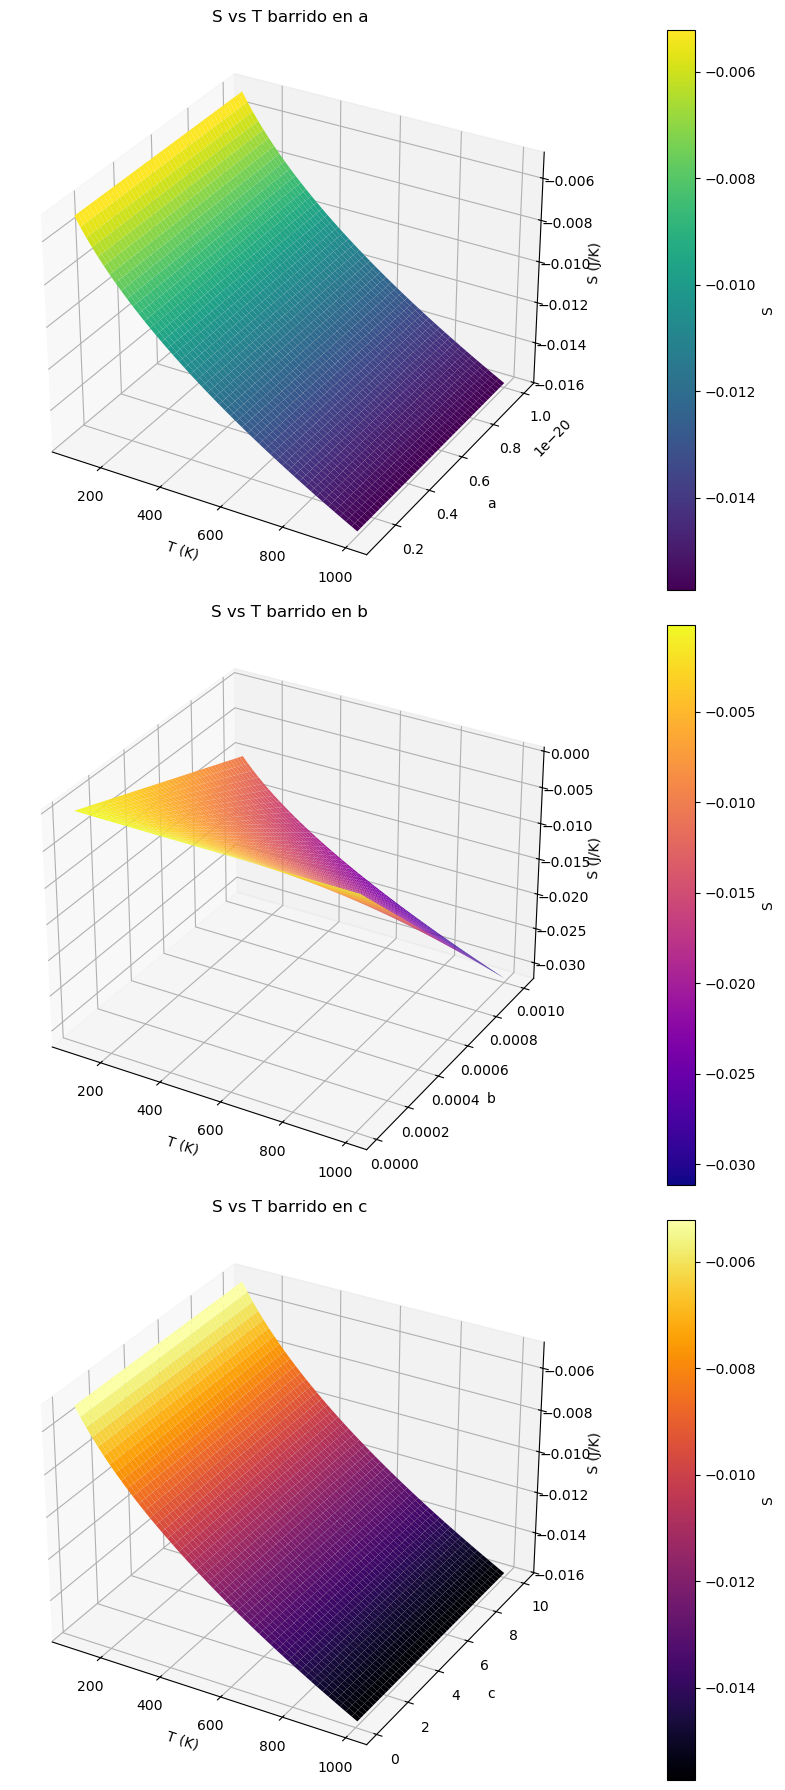

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # solo para activar el proyector 3D

# Rango de temperaturas
T_vals = np.linspace(100, 1000, 50)

# Rangos de parámetros a barrer
a_vals = np.linspace(1e-21, 1e-20, 50)
b_vals = np.linspace(1e-5, 1e-3, 50)
c_vals = np.linspace(0.1, 10, 50)

# Valores fijos para los otros dos parámetros
b0, c0 = 5e-4, 5
a0, c0_ = 5e-21, 5   # para el barrido de b
a0_, b0_ = 5e-21, 5e-4  # para el barrido de c

fig = plt.figure(figsize=(10, 18))

# 1) Barrido de 'a'
ax = fig.add_subplot(3, 1, 1, projection='3d')
T_grid, A_grid = np.meshgrid(T_vals, a_vals)
# calcular entropía para cada (T, a)
E_grid = np.vectorize(lambda T, a: entropy(T, a, b0, c0))(T_grid, A_grid)
surf = ax.plot_surface(T_grid, A_grid, E_grid, cmap='viridis')
ax.set_xlabel('T (K)')
ax.set_ylabel('a')
ax.set_zlabel('S (J/K)')
ax.set_title('S vs T barrido en a')
fig.colorbar(surf, ax=ax, pad=0.1, label='S')

# 2) Barrido de 'b'
ax = fig.add_subplot(3, 1, 2, projection='3d')
T_grid, B_grid = np.meshgrid(T_vals, b_vals)
E_grid = np.vectorize(lambda T, b: entropy(T, a0, b, c0_))(T_grid, B_grid)
surf = ax.plot_surface(T_grid, B_grid, E_grid, cmap='plasma')
ax.set_xlabel('T (K)')
ax.set_ylabel('b')
ax.set_zlabel('S (J/K)')
ax.set_title('S vs T barrido en b')
fig.colorbar(surf, ax=ax, pad=0.1, label='S')

# 3) Barrido de 'c'
ax = fig.add_subplot(3, 1, 3, projection='3d')
T_grid, C_grid = np.meshgrid(T_vals, c_vals)
E_grid = np.vectorize(lambda T, c: entropy(T, a0_, b0_, c))(T_grid, C_grid)
surf = ax.plot_surface(T_grid, C_grid, E_grid, cmap='inferno')
ax.set_xlabel('T (K)')
ax.set_ylabel('c')
ax.set_zlabel('S (J/K)')
ax.set_title('S vs T barrido en c')
fig.colorbar(surf, ax=ax, pad=0.1, label='S')

plt.tight_layout()
plt.show()


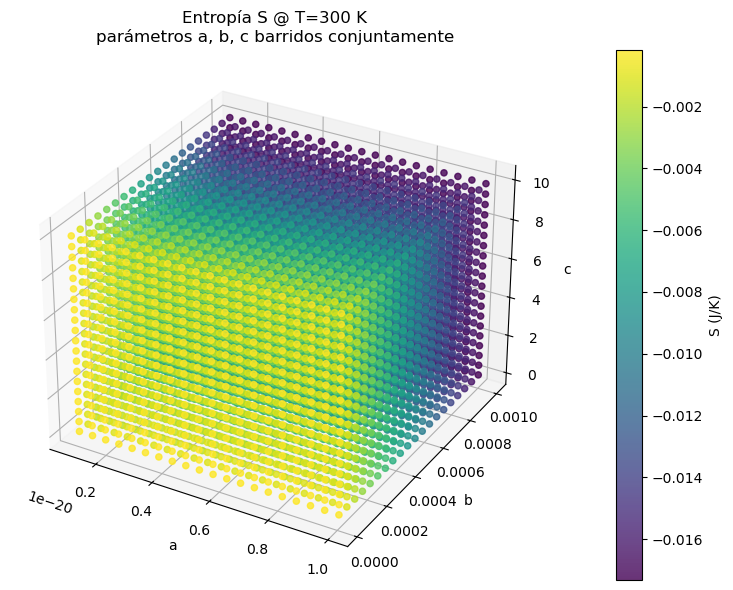

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # activa proyección 3D

# --- Definición de rangos ---
T_vals = np.linspace(100, 1000, 10)      # menos puntos para agilizar
a_vals = np.linspace(1e-21, 1e-20, 20)
b_vals = np.linspace(1e-5, 1e-3, 20)
c_vals = np.linspace(0.1, 10, 20)

# Elegimos un valor fijo de T para la exploración conjunta
T_fixed = 300  # K

# --- Construcción del grid 3D de parámetros ---
A, B, C = np.meshgrid(a_vals, b_vals, c_vals, indexing='ij')
A_flat = A.ravel()
B_flat = B.ravel()
C_flat = C.ravel()

# --- Cálculo vectorizado de S ---
S_flat = entropy(T_fixed, A_flat, B_flat, C_flat)

# --- Gráfico 3D de scatter ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(
    A_flat, B_flat, C_flat,
    c=S_flat,             # color según entropía
    cmap='viridis',
    s=20,                 # tamaño de los puntos
    alpha=0.8
)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.set_title(f'Entropía S @ T={T_fixed} K\nparámetros a, b, c barridos conjuntamente')

cb = fig.colorbar(p, ax=ax, pad=0.1)
cb.set_label('S (J/K)')

plt.tight_layout()
plt.show()


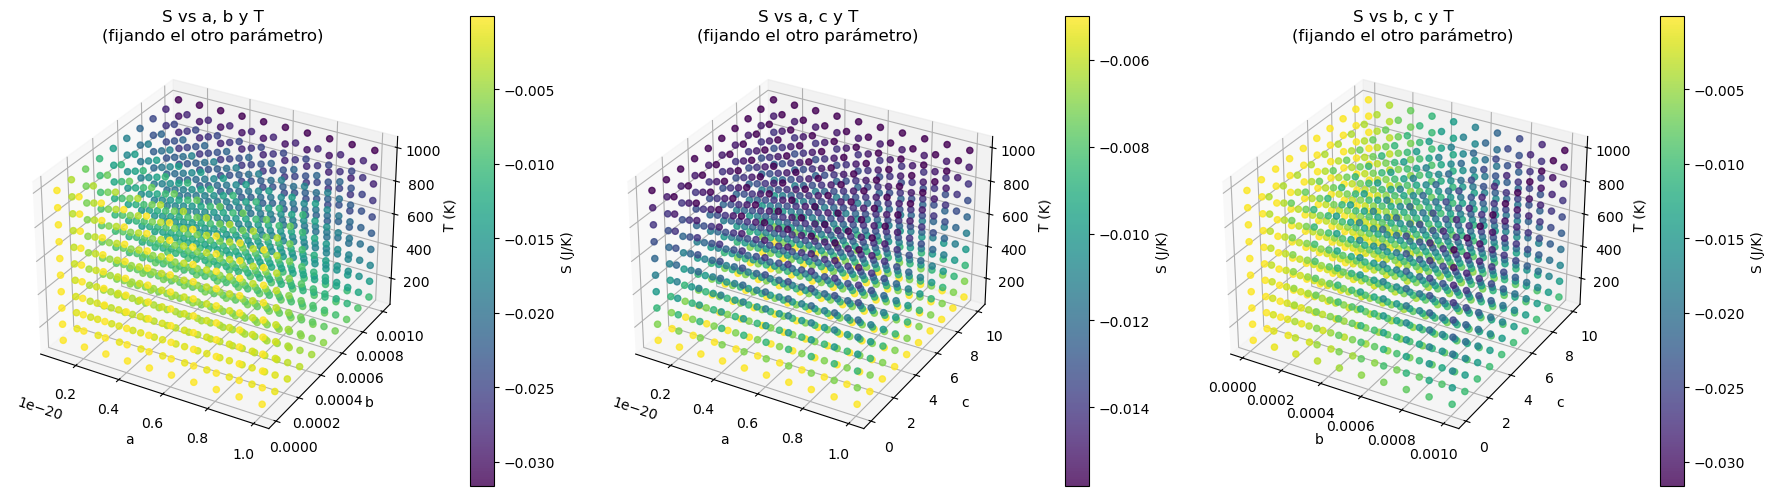

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # activa proyección 3D

# --- Rangos de los parámetros ---
T_vals = np.linspace(100, 1000, 10)      # temperaturas
a_vals = np.linspace(1e-21, 1e-20, 10)   # parámetro a
b_vals = np.linspace(1e-5,   1e-3, 10)   # parámetro b
c_vals = np.linspace(0.1,    10,   10)   # parámetro c

# Valores de referencia para fijar el tercer parámetro
a0, b0, c0 = 5e-21, 5e-4, 5

# Configuración de los "panels" para los tres pares
pairs = [
    ('a', 'b', a_vals, b_vals, c0),  # exploramos a y b, fijamos c=c0
    ('a', 'c', a_vals, c_vals, b0),  # exploramos a y c, fijamos b=b0
    ('b', 'c', b_vals, c_vals, a0),  # exploramos b y c, fijamos a=a0
]

fig = plt.figure(figsize=(18, 5))

for i, (p1, p2, vals1, vals2, fixed) in enumerate(pairs, 1):
    # Creamos un grid (p1, p2, T)
    P1, P2, T = np.meshgrid(vals1, vals2, T_vals, indexing='ij')
    
    # Calculamos S según qué parámetros van en cada posición
    if (p1, p2) == ('a', 'b'):
        S = entropy(T, P1, P2, fixed)
    elif (p1, p2) == ('a', 'c'):
        S = entropy(T, P1, fixed, P2)
    else:  # ('b','c')
        S = entropy(T, fixed, P1, P2)
    
    # Subplot 3D
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(
        P1.ravel(), P2.ravel(), T.ravel(),
        c=S.ravel(), cmap='viridis',
        s=20, alpha=0.8
    )
    ax.set_xlabel(p1)
    ax.set_ylabel(p2)
    ax.set_zlabel('T (K)')
    ax.set_title(f'S vs {p1}, {p2} y T\n(fijando el otro parámetro)')
    fig.colorbar(sc, ax=ax, pad=0.1, label='S (J/K)')

plt.tight_layout()
plt.show()
